# Decision Trees

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


<img src="penguin.jpg" style="max-width:400px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak"

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("penguins_size.csv")

In [2]:
df.head()

NameError: name 'df' is not defined

## EDA

### Missing Data

Recall the purpose is to create a model for future use, so data points missing crucial information won't help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [3]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.isna().sum()

In [4]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

In [5]:
df = df.dropna()

NameError: name 'df' is not defined

In [6]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.head()

In [ ]:
df['sex'].unique()

In [ ]:
df['island'].unique()

In [7]:
df = df[df['sex']!='.']

NameError: name 'df' is not defined

## Visualization

In [8]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

NameError: name 'sns' is not defined

In [ ]:
sns.pairplot(df,hue='species',palette='Dark2')

In [ ]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

## Feature Engineering

In [9]:
pd.get_dummies(df)

NameError: name 'pd' is not defined

In [10]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

NameError: name 'pd' is not defined

## Train | Test Split

In [11]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

NameError: name 'pd' is not defined

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

NameError: name 'X' is not defined

# Decision Tree Classifier

## Default Hyperparameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
base_pred = model.predict(X_test)

## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
confusion_matrix(y_test,base_pred)

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [14]:
print(classification_report(y_test,base_pred))

NameError: name 'classification_report' is not defined

In [ ]:
model.feature_importances_

In [ ]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

In [ ]:
sns.boxplot(x='species',y='body_mass_g',data=df)

## Visualize the Tree

This function is fairly new, you may want to review the online docs:

Online Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [15]:
from sklearn.tree import plot_tree

In [16]:
plt.figure(figsize=(12,8))
plot_tree(model);

NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

## Reporting Model Results

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

## Understanding Hyperparameters

### Max Depth

In [18]:
DecisionTreeClassifier(criterion ="entropy",splitter="random",max_depth=8, min_samples_split= 100, max_features='log2' )

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
help(DecisionTreeClassifier)

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100





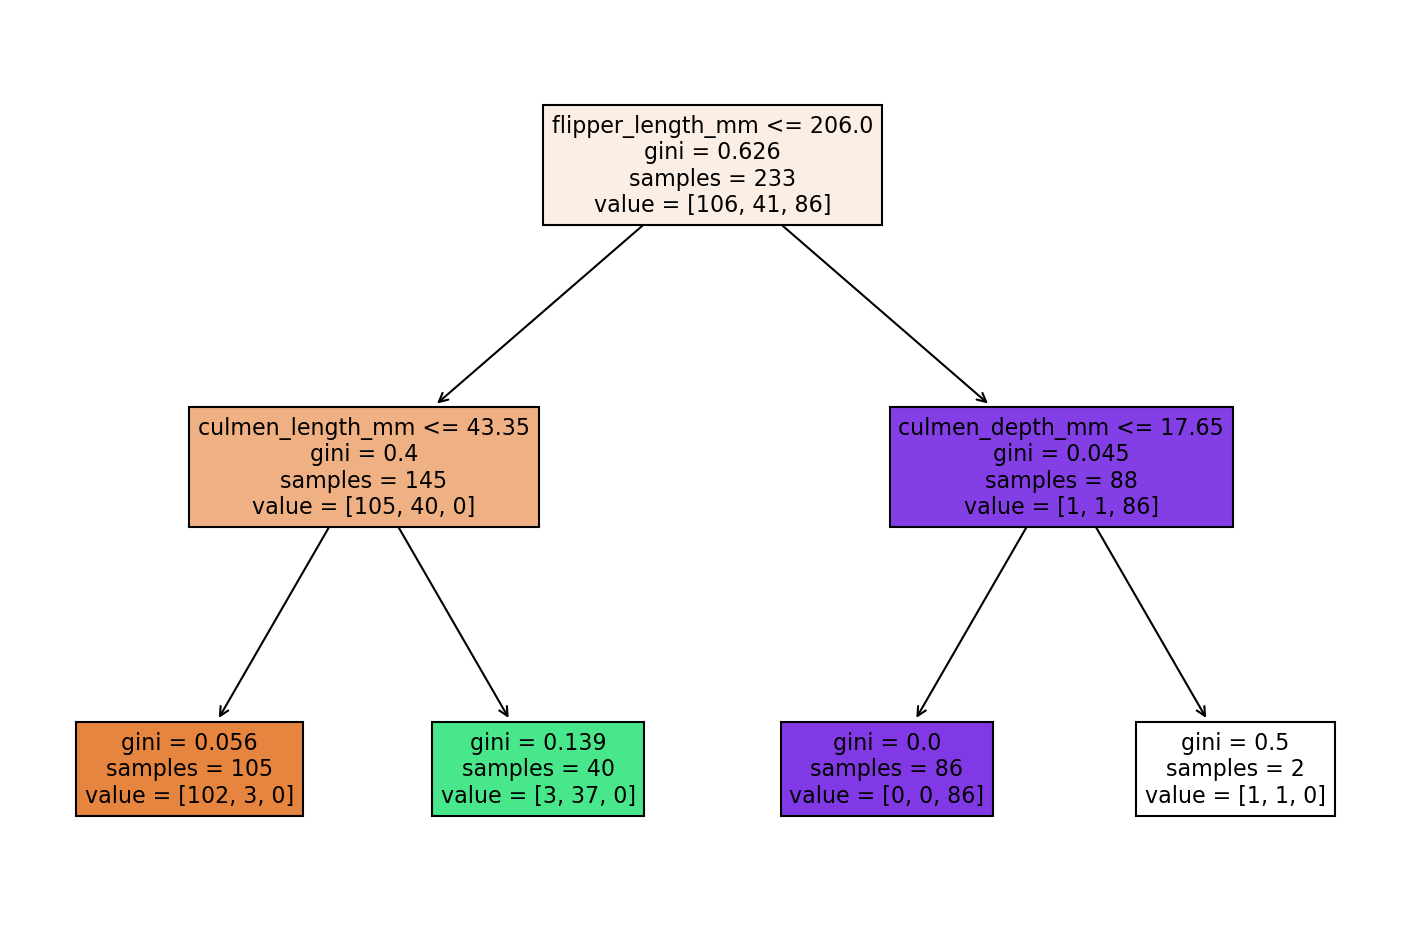

In [ ]:
report_model(pruned_tree)

## Max Leaf Nodes

In [ ]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100





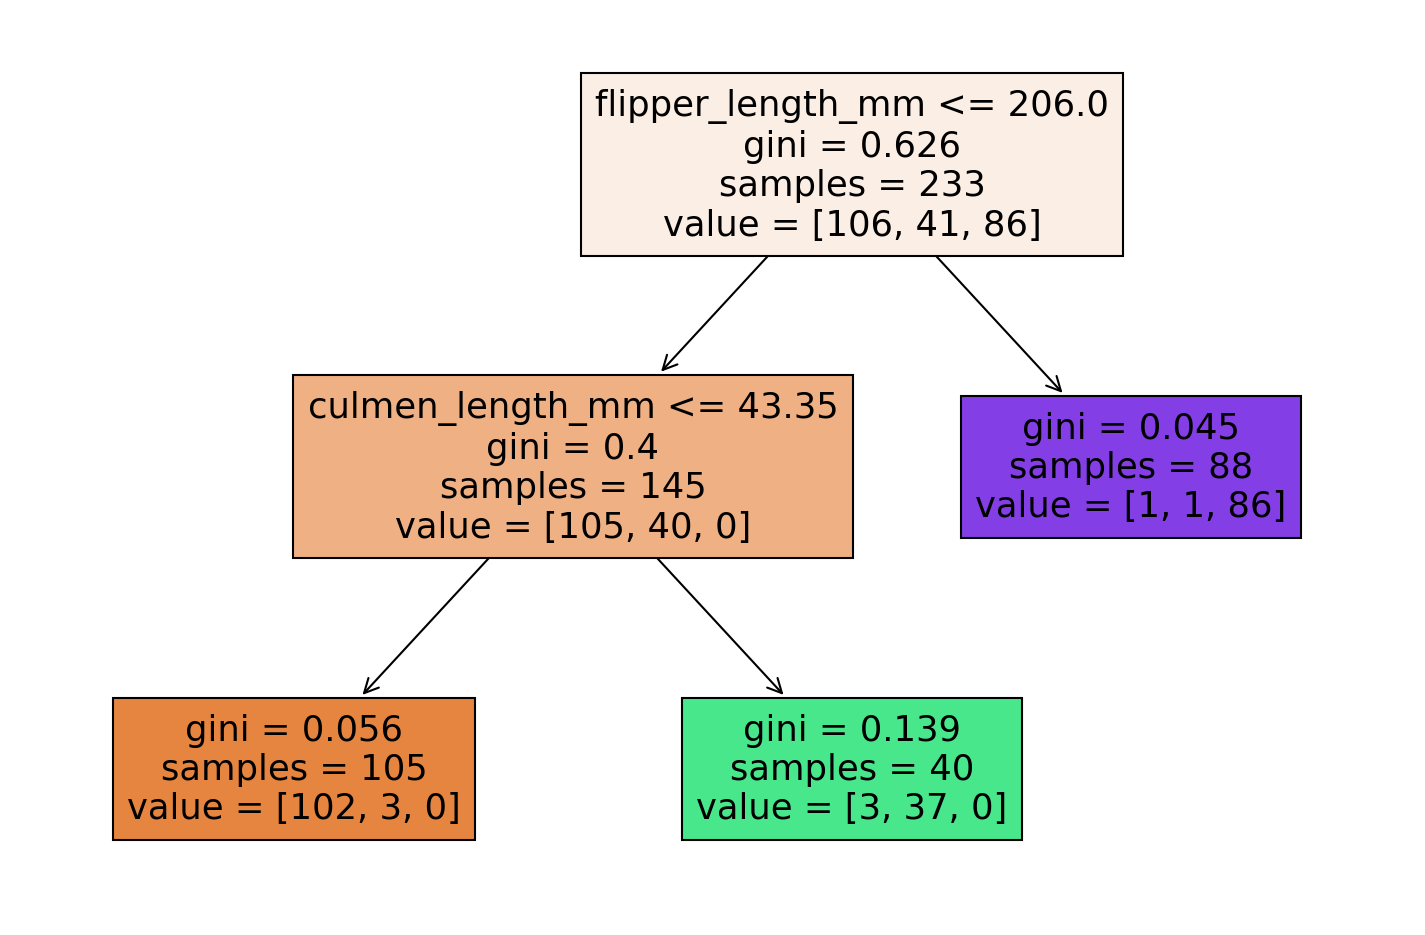

In [ ]:
report_model(pruned_tree)

## Criterion

In [ ]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100





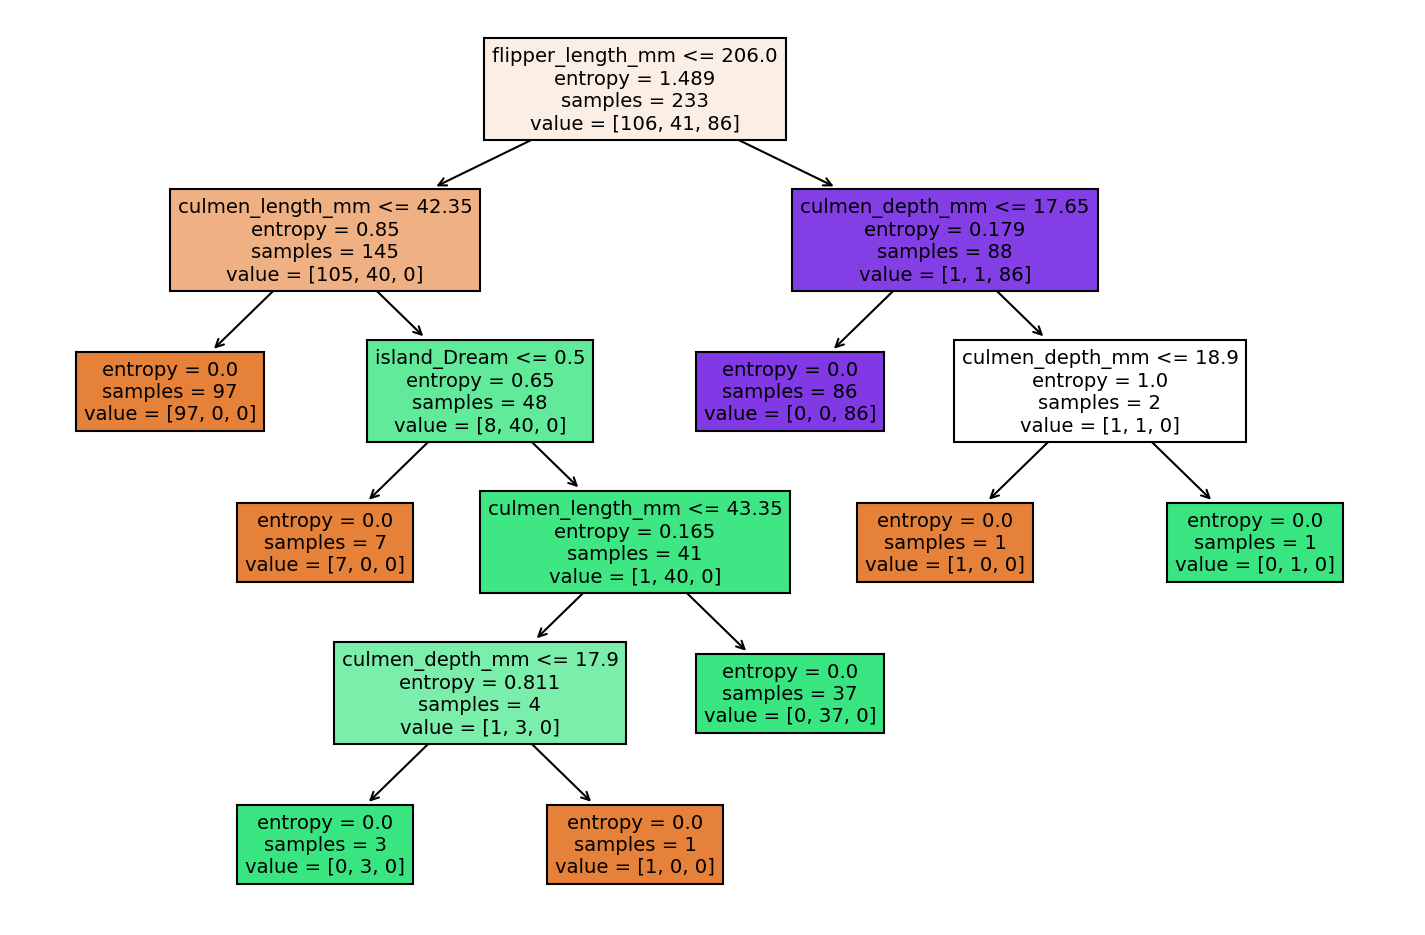

In [ ]:
report_model(entropy_tree)

---